In [ ]:
#Active learnibg template for regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from modAL.models import ActiveLearner

%matplotlib inline

In [2]:
X = np.random.choice(np.linspace(0, 20, 10000), size=200, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

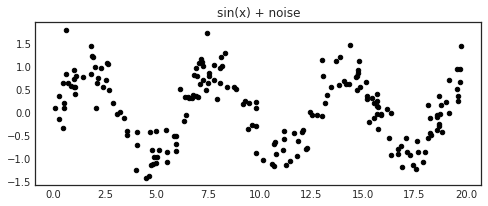

In [4]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(8, 3))
    plt.scatter(X, y, c='k', s=20)
    plt.title('sin(x) + noise')
    plt.show()

In [5]:
def GP_regression_std(regressor, X):
    _, std = regressor.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]

In [6]:
n_initial = 5
initial_idx = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_training, y_training = X[initial_idx], y[initial_idx]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

regressor = ActiveLearner(
    estimator=GaussianProcessRegressor(kernel=kernel),
    query_strategy=GP_regression_std,
    X_training=X_training.reshape(-1, 1), y_training=y_training.reshape(-1, 1)
)

In [7]:
X_grid = np.linspace(0, 20, 1000)
y_pred, y_std = regressor.predict(X_grid.reshape(-1, 1), return_std=True)
y_pred, y_std = y_pred.ravel(), y_std.ravel()

In [23]:
len(X_grid)

1000

In [19]:
y_pred[0:10]

array([0.70304118, 0.70406995, 0.70507875, 0.70606749, 0.70703607,
       0.7079844 , 0.70891238, 0.70981993, 0.71070695, 0.71157337])

In [20]:
y_std[0:10]

array([0.44705235, 0.44384718, 0.44065882, 0.437488  , 0.43433546,
       0.43120194, 0.4280882 , 0.42499499, 0.4219231 , 0.4188733 ])

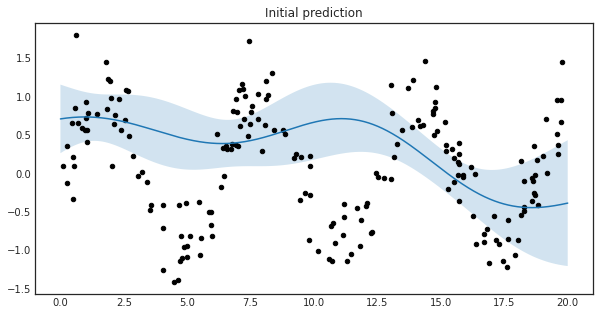

In [11]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.plot(X_grid, y_pred)
    plt.fill_between(X_grid,y_pred - y_std, y_pred + y_std, alpha=0.2)
    plt.scatter(X, y, c='k', s=20)
    plt.title('Initial prediction')
    plt.show()

In [16]:
# with active learning
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = regressor.query(X)
    print(query_idx,'\t\t', query_instance)
    print(X[query_idx],y[query_idx])
    print('---------------------------')
    
    regressor.teach(X[query_idx].reshape(1, -1), y[query_idx].reshape(1, -1))

54 		 [18.84788479]
[18.84788479] [-0.4188345]
---------------------------
129 		 [10.71707171]
[10.71707171] [-1.15504145]
---------------------------
25 		 [14.35943594]
[14.35943594] [1.46298182]
---------------------------
7 		 [12.51525153]
[12.51525153] [-0.05042057]
---------------------------
89 		 [0.0940094]
[0.0940094] [0.09222862]
---------------------------
153 		 [7.53675368]
[7.53675368] [0.8666507]
---------------------------
156 		 [19.7719772]
[19.7719772] [1.45009695]
---------------------------
43 		 [9.19291929]
[9.19291929] [0.19107065]
---------------------------
155 		 [4.72247225]
[4.72247225] [-1.1527839]
---------------------------
131 		 [1.42414241]
[1.42414241] [0.76183464]
---------------------------


In [17]:
y_pred_final, y_std_final = regressor.predict(X_grid.reshape(-1, 1), return_std=True)
y_pred_final, y_std_final = y_pred_final.ravel(), y_std_final.ravel()

In [24]:
print(len(y_pred_final),len(y_pred))

1000 1000


In [21]:
y_pred_final[0:10]

array([0.0780415 , 0.08658893, 0.09525533, 0.10403794, 0.11293387,
       0.12194012, 0.13105357, 0.14027097, 0.14958897, 0.15900408])

In [22]:
y_std_final[0:10]

array([0.39369872, 0.39178203, 0.39002175, 0.38841334, 0.38695187,
       0.38563211, 0.38444851, 0.38339529, 0.38246643, 0.38165572])

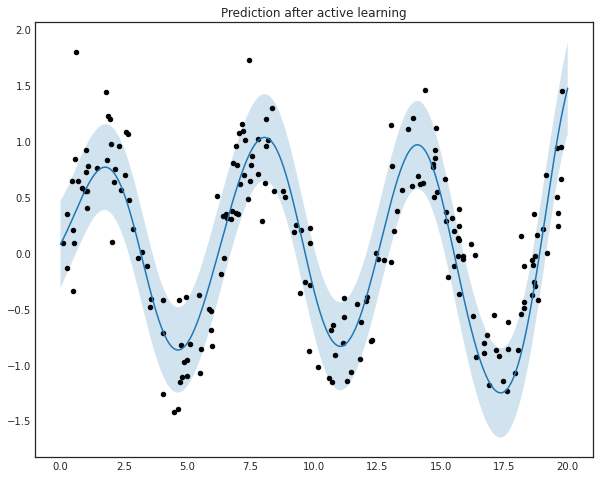

In [18]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 8))
    plt.plot(X_grid, y_pred_final)
    plt.fill_between(X_grid, y_pred_final - y_std_final, y_pred_final + y_std_final, alpha=0.2)
    plt.scatter(X, y, c='k', s=20)
    plt.title('Prediction after active learning')
    plt.show()
